# Read the nested json file to a pandas data frame

This json file was generated in Matlab. We exported a nested Matlab table into a nested json file. To use it in Python, we provide a script to read it into a pandas dataframe.


## Install required packages in the current Jupyter kernel

In [1]:
import sys
# If you use conda
# !conda install --yes --prefix {sys.prefix} numpy
# !conda install --yes --prefix {sys.prefix} pandas
# !conda install --yes --prefix {sys.prefix} matplotlib

# If you use pip
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install jsonpath_rw

## Import required libraries for analysis and plot

In [10]:
# Import libraries
import os
import pandas as pd
import numpy as np
import json
from jsonpath_rw import parse


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

### Define paths

In [11]:
# Edit the path with the location the json file was downloaded and unzipped
pathName      = './'
fileName      = 'AllV04_multiSiteAndMeas_ComputationalReproducibility_2020-08-03T12-36.json'
fNameWithPath = os.path.join(pathName, fileName)

## Pandas
### Read the file

In [12]:
# Read the file to a Pandas structure
dt = pd.read_json(fNameWithPath)

### Explore main contents
In the first level, we have 15 different types of variables:

A. Four simple (one value) variables:
1. Proj: Project name
1. SubjID: unique subject ID in the project
1. Struct: Name of the white matter structure or tract
1. TRT: if the data corresponds to the TEST or RETEST session. A subject can have only TEST. 

B. Eight array variables, corresponding to the summary statistics:
1. fa
1. ad
1. cl
1. curvature
1. md
1. rd
1. torsion
1. volume

C. Three subtables with nested data with metadata information:
1. SubjectMD:  Subject information and behavioral results
1. AcquMD:     MRI Acquisition information
1. AnalysisMD: Analysis parameters and details information

In [5]:
dt[:3]  # See first 3 rows

,Proj,Struct,SubjID,TRT,ad,curvature,fa,md,rd,torsion,volume,SubjectMD,AcquMD,AnalysisMD
0,YWM,LeftThalamicRadiation,036_HM,TEST,"[1.10686774015895, 1.10282173420415, 1.1016997...","[0.056174088521258006, 0.084126603210461, 0.09...","[0.33872808130978604, 0.34027080406271104, 0.3...","[0.794445057479731, 0.78972660203269, 0.785253...","[0.638233716140119, 0.633179035946959, 0.62702...","[0.056621518940357, -0.24186227092408602, -0.2...","[321, 250, 305, 308, 301, 308, 304, 309, 323, ...","[{'AGE': 12, 'analyses': [], 'code': '036_HM',...","[{'AcquisitionDateTime': '', 'AcquisitionMatri...","[{'AFQ_Browser_Title': 'AFQ_Browser', 'AFQ_Out..."
1,YWM,RightThalamicRadiation,036_HM,TEST,"[1.0286278050876, 1.03237912405886, 1.03880792...","[0.08656930273285601, 0.105496520227217, 0.114...","[0.276708721819785, 0.279782012924356, 0.28466...","[0.79452262149724, 0.795120227732606, 0.796094...","[0.677470029702061, 0.676490779569481, 0.67473...","[-0.116814010497821, -0.128371951251356, 0.023...","[157, 133, 152, 153, 156, 165, 161, 171, 172, ...","[{'AGE': 12, 'analyses': [], 'code': '036_HM',...","[{'AcquisitionDateTime': '', 'AcquisitionMatri...","[{'AFQ_Browser_Title': 'AFQ_Browser', 'AFQ_Out..."
2,YWM,LeftCorticospinal,036_HM,TEST,"[1.6975708899930702, 1.7132275680131501, 1.723...","[0.072781561255574, 0.081586187429629, 0.09698...","[0.6188707163567211, 0.6300176222572591, 0.646...","[0.9462875028532121, 0.9408425194108551, 0.927...","[0.570645809283284, 0.554649995109709, 0.53035...","[-0.053852082482733, 0.12404491093655, 0.07656...","[321, 277, 310, 315, 318, 337, 349, 355, 350, ...","[{'AGE': 12, 'analyses': [], 'code': '036_HM',...","[{'AcquisitionDateTime': '', 'AcquisitionMatri...","[{'AFQ_Browser_Title': 'AFQ_Browser', 'AFQ_Out..."


To start checking the values, for example read and plot the fractional anisotropy (FA) values of Subject:036, Proj:YWM, Struct:LeftCorticospinal:

In [6]:
myFA = dt.fa[(dt.Proj=="YWM") & (dt.SubjID=="036_HM") & (dt.Struct=="LeftCorticospinal")]
print(myFA)

2     [0.6188707163567211, 0.6300176222572591, 0.646...
22    [0.576489516312185, 0.582661687631237, 0.58179...
Name: fa, dtype: object


There are two 100 value arrays. One important variable for this dataset is missing. In the YWM project, every subject attended only one session (TEST), but they had two scans performed in each session (with different bValues, number of directions...). Only one value is enough to separate the two arrays, bValue for example. 

Next, extract from the AcquMD subtablethe bValue parameter and slice the dataset again to obtain one single array. 

In [7]:
# Extract the variable AcquMD.scanbValue to the first level to make it more useful
dt['bValue'] = pd.Series([dt['AcquMD'][i][0]['scanbValue'] for i in dt.index], index=dt.index)

# Slice it adding the new variable:
myFA1000 = dt.fa[(dt.bValue==1000) & (dt.Proj=="YWM") & (dt.SubjID=="036_HM") & (dt.Struct=="LeftCorticospinal")]
myFA2000 = dt.fa[(dt.bValue==2000) & (dt.Proj=="YWM") & (dt.SubjID=="036_HM") & (dt.Struct=="LeftCorticospinal")]
print(myFA1000)
print(myFA2000)

2    [0.6188707163567211, 0.6300176222572591, 0.646...
Name: fa, dtype: object
22    [0.576489516312185, 0.582661687631237, 0.58179...
Name: fa, dtype: object


No we have the Left Arcuate's FA profile of subject 036_HM, for b values 1000 and 2000.

Plot it for visualization:

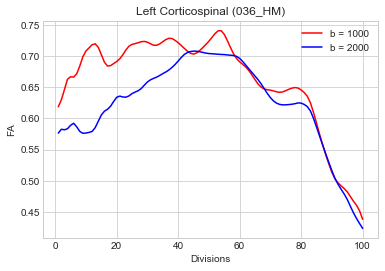

In [8]:
x        = np.arange(start=1, stop=101, step=1)
y1000    = myFA1000.to_numpy()[0]
y2000    = myFA2000.to_numpy()[0]

fig = plt.figure()
ax  = plt.axes()
plt.plot(x, y1000, '-r', label='b = 1000')
plt.plot(x, y2000, '-b', label='b = 2000')
plt.legend();


plt.title("Left Corticospinal (036_HM)")
plt.xlabel("Divisions")
plt.ylabel("FA");

### Explore other variables
For example, the variables associated to SubjectMD. SubjectMD contains another sub-table called info. 

In [8]:
dt['info'] = pd.Series([dt['SubjectMD'][i][0]['info'] for i in dt.index], index=dt.index)

In [10]:
# Check all values inside info
print(dt.iloc[0].info[0].keys())

dict_keys(['AGE', 'AGE_AT_BEHAVIORAL_TESTING0x2C_MONTHS', 'AGE_AT_BEHAVIORAL_TESTING0x2C_YEARS', 'AGE_AT_BEHAVIORAL_TESTING_0x28ROUNDED0x29', 'AGE_AT_MRI0x2C_MONTHS', 'AGE_AT_MRI0x2C_YEARS', 'AGE_AT_MRI_0x28ROUNDED0x29', 'AVG_PDE_AB_SS', 'AVG_SWE_AB_SS', 'BIRTHDATE', 'CODE', 'DATE_OF_BEHAVIORAL_TESTING', 'DATE_OF_MRI', 'EYE', 'FOOT', 'GENDER_MALE1_FEMALE2', 'HANDEDNESS_R0x2FL', 'INITIALS', 'L', 'LQ', 'PDE_A_RAW', 'PDE_A_SS', 'PDE_B_RAW', 'PDE_B_SS', 'R', 'ReadEng_AgeAdj', 'SEX', 'SWE_A_RAW', 'SWE_A_SS', 'SWE_B_RAW', 'SWE_B_SS', 'WASI_IQ_SS', 'WASI_MATRIX_RAW', 'WASI_MATRIX_T', 'WASI_VOCAB_RAW', 'WASI_VOCAB_T', 'WH_ID', 'WID_RAW', 'WID_SS'])


In [11]:
# and extract to the first level only the one's we are interested in
dt['birthdate'] = pd.Series([dt['info'][i][0]['BIRTHDATE'] for i in dt.index], index=dt.index)

Do the same with AnalysisMD. First we check what kind of information we have here. 

In [12]:
print(dt.iloc[0].AnalysisMD[0].keys())

dict_keys(['AFQ_Browser_Title', 'AFQ_Output_Name', 'ET_angleValues', 'ET_maxlength', 'ET_minlength', 'ET_numberFibers', 'ET_runET', 'bsplineInterpFlag', 'cleanClippedFibers', 'cleanFibers', 'cleanIter', 'clip2rois', 'computeCSD', 'computenorms', 'cutoffLower', 'cutoffUpper', 'dwOutMm_1', 'dwOutMm_2', 'dwOutMm_3', 'eddyCorrect', 'fiberWeighting', 'fitMethod', 'flipLrApFlag', 'imresample', 'life_discretization', 'life_num_iterations', 'life_runLife', 'life_saveOutput', 'life_test', 'life_writePDB', 'maxDist', 'maxLen', 'mrtrix_autolmax', 'mrtrix_lmax', 'mrtrix_mrTrixAlgo', 'mrtrix_multishell', 'mrtrix_tool', 'mrtrix_useACT', 'nStep', 'noiseCalcMethod', 'normalization', 'numBootStrapSamples', 'numberOfNodes', 'phaseEncodeDir', 'rotateBvecsWithCanXform', 'rotateBvecsWithRx', 'savefigs', 'track_algorithm', 'track_angleThresh', 'track_faMaskThresh', 'track_faThresh', 'track_maxLengthThreshMm', 'track_minLengthThreshMm', 'track_nfibers', 'track_offsetJitter', 'track_seedVoxelOffset_1', 'track

To check, we extract one of the values and see that there is only one value through the whole dataset.

In [13]:
dt['ET_angleValues'] = pd.Series([dt['AnalysisMD'][i][0]['ET_angleValues'] for i in dt.index], index=dt.index)
dt['ET_angleValues'].unique()

array(['47.2, 23.1, 11.5, 5.7, 2.9'], dtype=object)

## Python json parser to a dict
### Read the file

In [14]:
with open(fNameWithPath) as f:
    jd = json.load(f)

### Get values

In [15]:
# Read by line number. We know it from the previous example. Not very useful
myFA1000 = [match.value for match in parse('$[2].fa').find(jd)]
myFA2000 = [match.value for match in parse('$[22].fa').find(jd)]

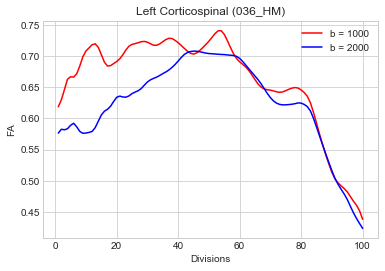

In [16]:
x        = np.arange(start=1, stop=101, step=1)
y1000    = np.transpose(myFA1000)
y2000    = np.transpose(myFA2000)

fig = plt.figure()
ax  = plt.axes()
plt.plot(x, y1000, '-r', label='b = 1000')
plt.plot(x, y2000, '-b', label='b = 2000')
plt.legend();

plt.title("Left Corticospinal (036_HM)")
plt.xlabel("Divisions")
plt.ylabel("FA");

In [17]:
# Same problem if we don't specify the bValue
FA = dict()
for i,d in enumerate(jd):
    if (d['Proj']=='YWM') & (d['SubjID']=='036_HM') & (d['Proj']=='YWM') & (d['Struct']=='LeftCorticospinal'):
        print('Line number: '+str(i)+', b value: ' + str(d['AcquMD'][0]['scanbValue']))
        FA[d['AcquMD'][0]['scanbValue']] = d['fa']


Line number: 2, b value: 1000
Line number: 22, b value: 2000


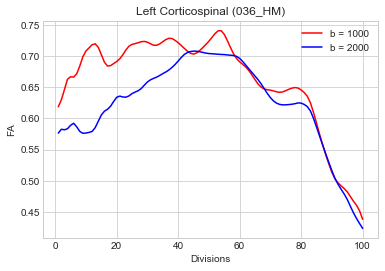

In [18]:
x        = np.arange(start=1, stop=101, step=1)
y1000    = np.transpose(FA[1000])
y2000    = np.transpose(FA[2000])

fig = plt.figure()
ax  = plt.axes()
plt.plot(x, y1000, '-r', label='b = 1000')
plt.plot(x, y2000, '-b', label='b = 2000')
plt.legend();

plt.title("Left Corticospinal (036_HM)")
plt.xlabel("Divisions")
plt.ylabel("FA");
